論文  
https://arxiv.org/abs/2112.10752<br>
<br>
GitHub  
https://github.com/CompVis/stable-diffusion<br>
<br>
<a href="https://colab.research.google.com/github/kaz12tech/ai_demos/blob/master/StableDiffusion_demo.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境セットアップ

## GPU確認

In [1]:
!nvidia-smi

Sat Aug 27 04:45:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## GitHubからコード取得

In [2]:
%cd /content

! git clone https://github.com/huggingface/diffusers.git

/content
fatal: destination path 'diffusers' already exists and is not an empty directory.


## ライブラリのインストール

In [3]:
%cd /content

!pip install diffusers transformers scipy ftfy

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Access Token取得
[Huggingface](https://huggingface.co/)にSign Up後メール認証<br>
その後、[CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4)にアクセスし以下に同意<br>
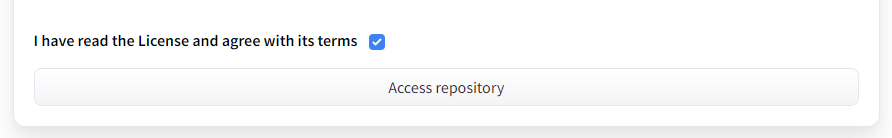
<br><br>
その後、Settings → Access Token
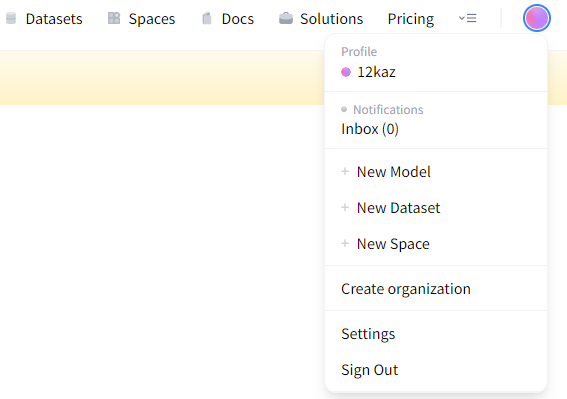


In [4]:
access_tokens="ここに取得したAccess Tokenを記載" # @param {type:"string"}

## ライブラリのインポート

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

import torch
from torch import autocast

%cd /content/diffusers/examples/inference

from image_to_image import StableDiffusionImg2ImgPipeline, preprocess

/content/diffusers/examples/inference


In [16]:
%cd /content/diffusers
filename = 'test_01.jpg'

!rm -rf {filename}

!wget -c https://www.pakutaso.com/shared/img/thumb/SAYA160312500I9A3721_TP_V4.jpg \
      -O {filename}

/content/diffusers
--2022-08-27 04:49:30--  https://www.pakutaso.com/shared/img/thumb/SAYA160312500I9A3721_TP_V4.jpg
Resolving www.pakutaso.com (www.pakutaso.com)... 180.235.251.31
Connecting to www.pakutaso.com (www.pakutaso.com)|180.235.251.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71908 (70K) [image/jpeg]
Saving to: ‘test_01.jpg’

test_01.jpg         100%[===================>]  70.22K   440KB/s    in 0.2s    

2022-08-27 04:49:31 (440 KB/s) - ‘test_01.jpg’ saved [71908/71908]



# Image to Image

## load model

In [7]:
%cd /content/diffusers

device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=access_tokens
).to(device)

/content/diffusers


## set prompt

In [49]:
prompt = "detailed CG art, woman at cafe" #@param {type:"string"}

## set image

/content/diffusers


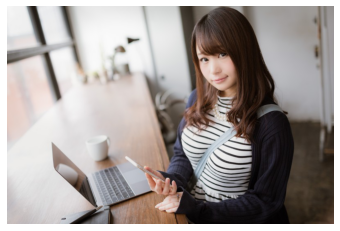

In [50]:
%cd /content/diffusers

init_image = Image.open(filename)
if '.png' in filename:
  init_image = init_image.convert('RGB')
resize_image = init_image.resize((768, 512))
input_img = preprocess(resize_image)

plt.imshow(resize_image)
plt.axis('off')
plt.show()

In [ ]:
generator = torch.Generator(device).manual_seed(12)

with autocast("cuda"):
  images = pipe(
      prompt=prompt, init_image=input_img, 
      strength=0.75, guidance_scale=7.5, 
      num_inference_steps=51, generator=generator,)["sample"]

images[0].save("img2img_01.png")

0it [00:00, ?it/s]

In [ ]:
plt.imshow(plt.imread("img2img_01.png"))

plt.axis('off')
plt.show()